Processing ./results/graph_7.vtp
PolyData (0x77fa301598a0)
  N Cells:    6258
  N Points:   3304
  N Strips:   0
  X Bounds:   0.000e+00, 1.500e+00
  Y Bounds:   0.000e+00, 4.000e-01
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   7
Available arrays: ['u', 'v', 'p', 'marker', 'pred_u', 'pred_v', 'pred_p']
u and pred_u differ for Velocity U. Mean absolute difference: 0.008376
u stats: min=0.000000, max=0.490706, mean=0.192339
pred_u stats: min=-0.011492, max=0.489498, mean=0.193967
v and pred_v differ for Velocity V. Mean absolute difference: 0.004794
v stats: min=-0.149507, max=0.178420, mean=0.000299
pred_v stats: min=-0.198675, max=0.179610, mean=0.000777
p and pred_p differ for Pressure P. Mean absolute difference: 0.028557
p stats: min=-0.136453, max=0.625073, mean=0.199017
pred_p stats: min=-0.009221, max=0.924238, mean=0.219770
Unified scalar range for Velocity U (GT, Pred): [-0.011491865, 0.49070597]


2025-08-22 00:32:52.475 ( 315.153s) [    77FAD0D67080]vtkOpenGLRenderWindow.c:649   WARN| Failed to load EGL! Please install the EGL library from your distribution's package manager.
2025-08-22 00:32:52.476 ( 315.154s) [    77FAD0D67080]vtkOpenGLRenderWindow.c:649   WARN| Failed to load EGL! Please install the EGL library from your distribution's package manager.


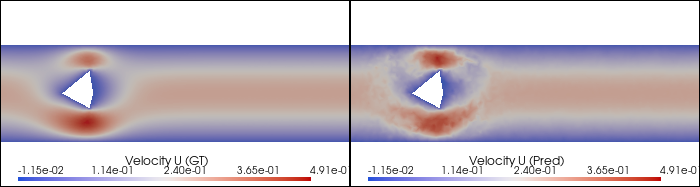

Saved output_u_comparison.png
Output image size: [700, 187]
Unified scalar range for Velocity V (GT, Pred): [-0.1986753, 0.17960998]


2025-08-22 00:32:52.625 ( 315.303s) [    77FAD0D67080]vtkOpenGLRenderWindow.c:649   WARN| Failed to load EGL! Please install the EGL library from your distribution's package manager.
2025-08-22 00:32:52.625 ( 315.303s) [    77FAD0D67080]vtkOpenGLRenderWindow.c:649   WARN| Failed to load EGL! Please install the EGL library from your distribution's package manager.


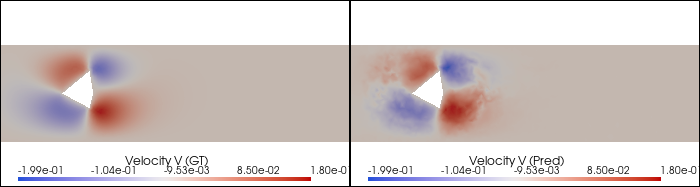

Saved output_v_comparison.png
Output image size: [700, 187]
Unified scalar range for Pressure P (GT, Pred): [-0.13645342, 0.92423797]


2025-08-22 00:32:52.773 ( 315.450s) [    77FAD0D67080]vtkOpenGLRenderWindow.c:649   WARN| Failed to load EGL! Please install the EGL library from your distribution's package manager.
2025-08-22 00:32:52.773 ( 315.451s) [    77FAD0D67080]vtkOpenGLRenderWindow.c:649   WARN| Failed to load EGL! Please install the EGL library from your distribution's package manager.


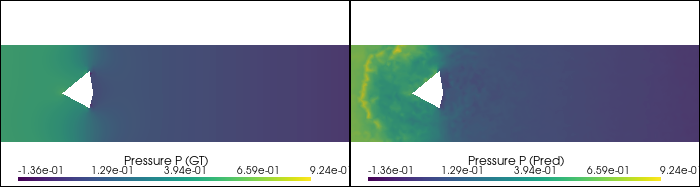

Saved output_p_comparison.png
Output image size: [700, 187]


In [3]:
import pyvista as pv
import os
import numpy as np

# Set up for headless rendering in Brev container
os.environ["MESA_GL_VERSION_OVERRIDE"] = "3.3"
pv.global_theme.jupyter_backend = "static"  # Explicitly set static backend
pv.global_theme.interactive = False  # Disable interactive rendering

# Configuration: Set to True to plot filtered fields, False for predicted fields
use_filtered = False  # Switch between predicted (False) and filtered (True)

# File to visualize
vtp_file = "./results/graph_7.vtp"

# Field pairs to visualize (ground truth, predicted or filtered) with color maps
field_pairs = [
    ("u", "pred_u" if not use_filtered else "filtered_u", "coolwarm", "Velocity U"),
    ("v", "pred_v" if not use_filtered else "filtered_v", "coolwarm", "Velocity V"),
    ("p", "pred_p" if not use_filtered else "filtered_p", "viridis", "Pressure P")
]

# Load the mesh
mesh = pv.read(vtp_file)
mesh = mesh.clean()

# Print mesh info for debugging
print(f"Processing {vtp_file}")
print(mesh)
print("Available arrays:", mesh.array_names)

# Check if fields are identical and print statistics
for gt_field, second_field, _, title in field_pairs:
    if gt_field in mesh.array_names and second_field in mesh.array_names:
        gt_data = mesh[gt_field]
        second_data = mesh[second_field]
        if np.allclose(gt_data, second_data, atol=1e-5):
            print(f"Warning: {gt_field} and {second_field} are identical for {title}")
        else:
            print(f"{gt_field} and {second_field} differ for {title}. Mean absolute difference: {np.mean(np.abs(gt_data - second_data)):.6f}")
        print(f"{gt_field} stats: min={gt_data.min():.6f}, max={gt_data.max():.6f}, mean={gt_data.mean():.6f}")
        print(f"{second_field} stats: min={second_data.min():.6f}, max={second_data.max():.6f}, mean={second_data.mean():.6f}")
    else:
        print(f"One or both fields ({gt_field}, {second_field}) not found in {vtp_file}")
        exit()

# Create two-column plots for each field pair
for gt_field, second_field, cmap, title in field_pairs:
    if gt_field not in mesh.array_names or second_field not in mesh.array_names:
        print(f"One or both fields ({gt_field}, {second_field}) not found in {vtp_file}")
        continue

    # Create a two-column plotter with optimized window size
    plotter = pv.Plotter(off_screen=True, shape=(1, 2), window_size=(700, 400))

    # Compute unified scalar range for ground truth and second field
    gt_data = mesh[gt_field]
    second_data = mesh[second_field]
    unified_range = [min(gt_data.min(), second_data.min()), max(gt_data.max(), second_data.max())]
    print(f"Unified scalar range for {title} (GT, {'Filtered' if use_filtered else 'Pred'}): {unified_range}")

    # Plot ground truth (first column)
    plotter.subplot(0, 0)
    plotter.add_mesh(
        mesh,
        scalars=gt_field,
        cmap=cmap,
        copy_mesh=True,
        clim=unified_range,
        line_width=2,
        opacity=0.9,
        show_scalar_bar=True,
        scalar_bar_args={
            "title": f"{title} (GT)",
            "vertical": False,
            "position_x": 0.05,
            "position_y": 0.03,
            "width": 0.85,
            "height": 0.07,
            "title_font_size": 12,
            "label_font_size": 10,
            "n_labels": 5,
            "fmt": "%.2e"
        }
    )
    plotter.view_xy()
    plotter.camera.tight(padding=0.05)
    plotter.camera.zoom(1.1)

    # Plot predicted or filtered (second column)
    plotter.subplot(0, 1)
    plotter.add_mesh(
        mesh,
        scalars=second_field,
        cmap=cmap,
        copy_mesh=True,
        clim=unified_range,
        line_width=2,
        opacity=0.9,
        show_scalar_bar=True,
        scalar_bar_args={
            "title": f"{title} ({'Filtered' if use_filtered else 'Pred'})",
            "vertical": False,
            "position_x": 0.05,
            "position_y": 0.03,
            "width": 0.85,
            "height": 0.07,
            "title_font_size": 12,
            "label_font_size": 10,
            "n_labels": 5,
            "fmt": "%.2e"
        }
    )
    plotter.view_xy()
    plotter.camera.tight(padding=0.05)
    plotter.camera.zoom(1.1)

    # Link camera views for consistent perspective
    plotter.link_views()

    # Save the comparison plot
    output_file = f"output_{gt_field}_comparison.png"
    plotter.show(screenshot=output_file)
    print(f"Saved {output_file}")
    print(f"Output image size: {plotter.window_size}")

In [71]:
print(mesh

PolyData (0x7b5ce753f040)
  N Cells:    6358
  N Points:   3349
  N Strips:   0
  X Bounds:   0.000e+00, 1.500e+00
  Y Bounds:   0.000e+00, 4.000e-01
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   13
